In [1]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
#making a directory
!mkdir ~/.kaggle

In [ ]:
#Copy the kaggle.json to created folder
!/content/kaggle.json ~/.kaggle/

In [5]:
#permisson for the json to act
! chmod 600 /content/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset

In [ ]:
! unzip /content/titanic-dataset.zip

In [9]:
import pandas as pd
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [10]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Cleaning**

In [11]:
df=df[['Age','Fare','Survived']]

In [12]:
df.sample(5)

,Age,Fare,Survived
237,8.0,26.2500,1
251,29.0,10.4625,0
49,18.0,17.8000,0
338,45.0,8.0500,1
153,40.5,14.5000,0


In [13]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

Filling the null value with the mean of the age column in the df

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define the ColumnTransformer
trans_age=ColumnTransformer([
    ('age_trans',SimpleImputer(strategy='mean'),[0])
],remainder='passthrough')

# fit the transform data
transform_data=trans_age.fit_transform(df)

# Update the data
df['Age']=transform_data[:,0]


In [15]:
df['Age'].isnull().sum()

0

**train_test_split is found in model_selection**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=['Survived']) , df['Survived'] , test_size=0.3 , random_state=0)


In [18]:
x_train.head(5)  #contains independent columns

,Age,Fare
857,51.000000,26.5500
52,49.000000,76.7292
386,1.000000,46.9000
124,54.000000,77.2875
578,29.699118,14.4583


In [19]:
y_train.head(5) #contains dependent/target column

857    1
52     1
386    0
124    0
578    0
Name: Survived, dtype: int64

**Preprocessing**

In [20]:
x_train.isnull().sum()

Age     0
Fare    0
dtype: int64

**QQ plot vs dist plot**

In [21]:
x_train.describe()

,Age,Fare
count,623.000000,623.000000
mean,29.873344,32.458273
std,13.019985,48.257658
min,0.670000,0.000000
25%,23.000000,7.925000
50%,29.699118,15.000000
75%,36.000000,31.387500
max,80.000000,512.329200


In [22]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

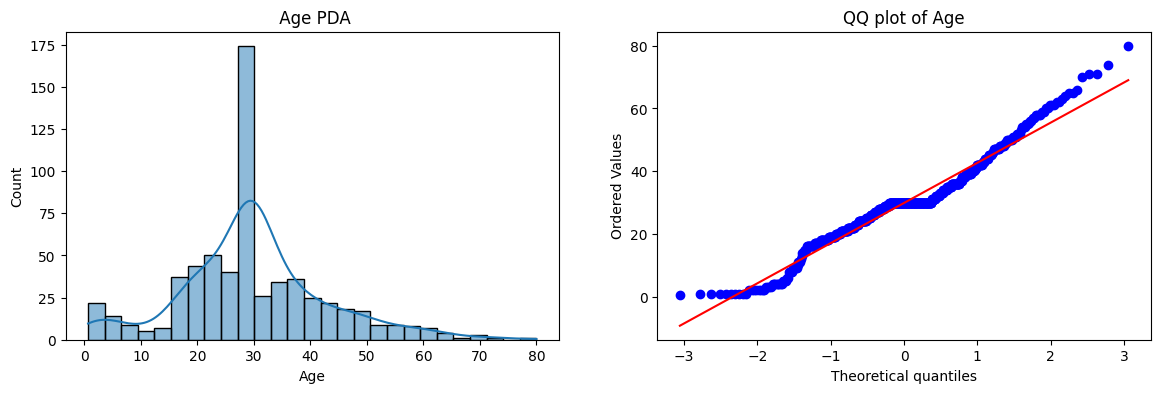

In [23]:
plt.figure(figsize=(14,4))

plt.subplot(121) #121: 1 row, 2 columns, subplot 1.
sns.histplot(x_train['Age'] , kde=True)  #kde=True adds a kernel density estimate curve to your histogram.
plt.title(" Age PDA")

plt.subplot(122) #122: 1 row, 2 columns, subplot 2.
stats.probplot(x_train['Age'] , dist = 'norm' , plot = plt)
plt.title('QQ plot of Age')

plt.show()

Text(0.5, 1.0, 'QQ plot of Fare')

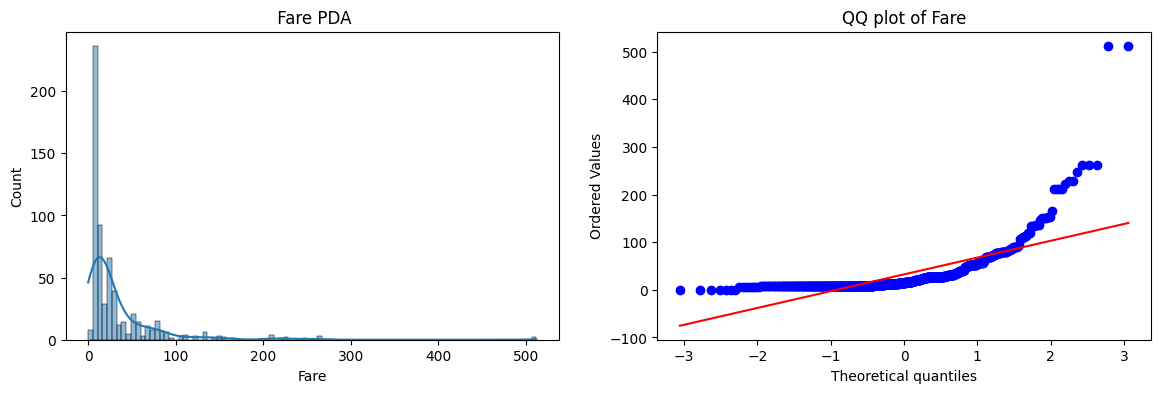

In [24]:
plt.figure(figsize=(14,4))

plt.subplot(121) #121: 1 row, 2 columns, subplot 1.
sns.histplot(x_train['Fare'] , kde=True)  #kde=True adds a kernel density estimate curve to your histogram.
plt.title(" Fare PDA")

plt.subplot(122) #122: 1 row, 2 columns, subplot 2.
stats.probplot(x_train['Fare'] , dist = 'norm' , plot = plt)
plt.title('QQ plot of Fare')

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
DTC=DecisionTreeClassifier()
LR=LogisticRegression()

In [28]:
DTC.fit(x_train,y_train)
LR.fit(x_train,y_train)

y_pred_dtc=DTC.predict(x_test)
y_pred_lr=LR.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy of DTC ",accuracy_score(y_test,y_pred_dtc))
print("Accuracy of LR ", accuracy_score(y_test,y_pred_lr))

Accuracy of DTC  0.667910447761194
Accuracy of LR  0.6865671641791045


**FuctionTransformer **

In [37]:
from sklearn.preprocessing import FunctionTransformer
from numpy import log1p       #You need to use the log1p function from numpy
ft=FunctionTransformer(func=log1p)

ft.fit(x_train)
x_train_ft=ft.transform(x_train)
x_test_ft=ft.transform(x_test)

In [39]:
DTC=DecisionTreeClassifier()
LR=LogisticRegression()

DTC.fit(x_train_ft,y_train)
LR.fit(x_train_ft,y_train)

y_pred_dtc=DTC.predict(x_test_ft)
y_pred_lr=LR.predict(x_test_ft)

In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy of DTC ",accuracy_score(y_test,y_pred_dtc))
print("Accuracy of LR ", accuracy_score(y_test,y_pred_lr))

Accuracy of DTC  0.6753731343283582
Accuracy of LR  0.7126865671641791


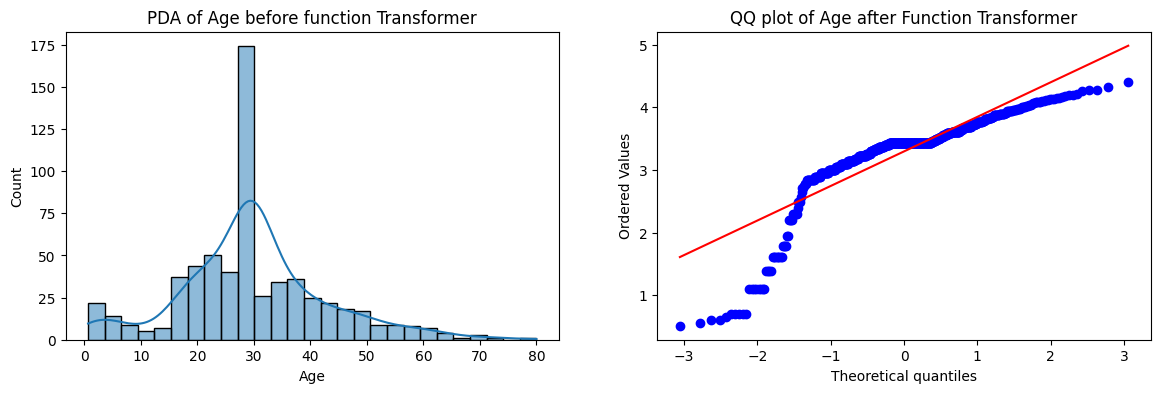

In [41]:
plt.figure(figsize=(14,4))

plt.subplot(121) #121: 1 row, 2 columns, subplot 1.
sns.histplot(x_train['Age'] , kde=True)  #kde=True adds a kernel density estimate curve to your histogram.
plt.title("PDA of Age before function Transformer")

plt.subplot(122) #122: 1 row, 2 columns, subplot 2.
stats.probplot(x_train_ft['Age'] , dist = 'norm' , plot = plt)
plt.title('QQ plot of Age after Function Transformer')

plt.show()

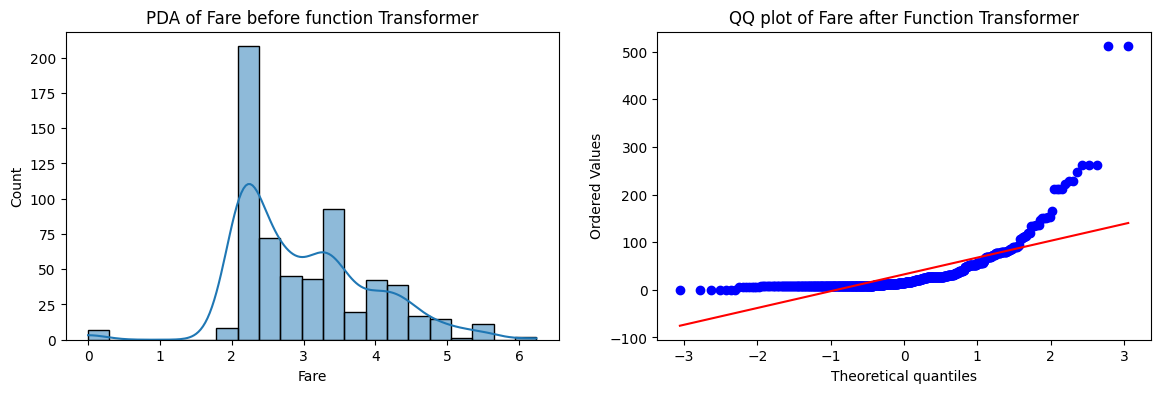

In [42]:
plt.figure(figsize=(14,4))

plt.subplot(121) #121: 1 row, 2 columns, subplot 1.
sns.histplot(x_train_ft['Fare'] , kde=True)  #kde=True adds a kernel density estimate curve to your histogram.
plt.title("PDA of Fare before function Transformer")

plt.subplot(122) #122: 1 row, 2 columns, subplot 2.
stats.probplot(x_train['Fare'] , dist = 'norm' , plot = plt)
plt.title('QQ plot of Fare after Function Transformer')

plt.show()

In [49]:
# apply log on with the fare columne
ft=FunctionTransformer(func=log1p)

cl=ColumnTransformer([
    ('log_fare',FunctionTransformer(func=log1p),['Fare'])
] ,  remainder='passthrough')

cl.fit(x_train)
new_x_train=ft.transform(x_train)
new_x_test=ft.transform(x_test)

DTC=DecisionTreeClassifier()
LR=LogisticRegression()

DTC.fit(new_x_train , y_train)
LR.fit(new_x_train ,y_train)

y_pred_dtc=DTC.predict(new_x_test)
y_pred_lr=LR.predict(new_x_test)

print("Accuracy of DTC ",accuracy_score(y_test,y_pred_dtc))
print("Accuracy of LR ", accuracy_score(y_test,y_pred_lr))

Accuracy of DTC  0.6828358208955224
Accuracy of LR  0.7126865671641791


In [48]:
from sklearn.model_selection import cross_val_score
# Cross-validation scores
dtc_cv_scores = cross_val_score(DTC, new_x_train, y_train, cv=5).mean()
lr_cv_scores = cross_val_score(LR, new_x_train, y_train, cv=5).mean()

print("Cross-validation scores for DTC:", dtc_cv_scores)
print("Cross-validation scores for LR:", lr_cv_scores)

Cross-validation scores for DTC: 0.6068258064516129
Cross-validation scores for LR: 0.667741935483871
